In [2006]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt


from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

import lightgbm as lgb
import xgboost as xgb

from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.metrics import log_loss, fbeta_score, make_scorer, confusion_matrix, roc_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2007]:
train_df = pd.read_csv('/Users/iddobloch/Library/Mobile Documents/com~apple~CloudDocs/Code/Projects/Data Projects/SpaceShip/spaceship-titanic/train.csv')
test_df = pd.read_csv('/Users/iddobloch/Library/Mobile Documents/com~apple~CloudDocs/Code/Projects/Data Projects/SpaceShip/spaceship-titanic/test.csv')
combine = [train_df, test_df]

train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [2008]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Analyze intial data

ID, Transported are full 


In [2009]:
train_df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [2010]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)   

HomePlanet  Transported
1     Europa     0.658846
2       Mars     0.523024
0      Earth     0.423946

In [2011]:
train_df[['Cabin', 'Transported']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Transported', ascending=False)

Cabin  Transported
6559     T/3/P          1.0
2004   E/513/S          1.0
4581  G/1012/P          1.0
4580  G/1011/S          1.0
2008   E/516/P          1.0
...        ...          ...
4263   F/797/P          0.0
4264   F/797/S          0.0
2295  F/1077/P          0.0
2291  F/1075/P          0.0
3280  F/1763/S          0.0

[6560 rows x 2 columns]

In [2012]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

Destination  Transported
0    55 Cancri e     0.610000
1  PSO J318.5-22     0.503769
2    TRAPPIST-1e     0.471175

In [2013]:
train_df[['Age', 'Transported']].groupby(['Age'], as_index=False).mean().sort_values(by='Transported', ascending=False)

Age  Transported
0    0.0     0.808989
3    3.0     0.786667
59  59.0     0.771429
4    4.0     0.746479
1    1.0     0.731343
..   ...          ...
78  78.0     0.333333
65  65.0     0.304348
69  69.0     0.166667
73  73.0     0.142857
79  79.0     0.000000

[80 rows x 2 columns]

In [2014]:
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

VIP  Transported
0  False     0.506332
1   True     0.381910

In [2015]:
train_df[['RoomService', 'Transported']].groupby(['RoomService'], as_index=False).mean().sort_values(by='Transported', ascending=False)

RoomService  Transported
1211       3551.0          1.0
349         403.0          1.0
326         375.0          1.0
99           99.0          1.0
327         376.0          1.0
...           ...          ...
616         762.0          0.0
617         764.0          0.0
618         765.0          0.0
620         767.0          0.0
1272      14327.0          0.0

[1273 rows x 2 columns]

In [2016]:
train_df[['FoodCourt', 'Transported']].groupby(['FoodCourt'], as_index=False).mean().sort_values(by='Transported', ascending=False)

FoodCourt  Transported
1506    29813.0          1.0
985      1972.0          1.0
950      1778.0          1.0
955      1808.0          1.0
956      1809.0          1.0
...         ...          ...
386       474.0          0.0
929      1678.0          0.0
385       473.0          0.0
931      1706.0          0.0
753      1111.0          0.0

[1507 rows x 2 columns]

In [2017]:
train_df[['ShoppingMall' , 'Transported']].groupby(['ShoppingMall'], as_index=False).mean().sort_values(by='Transported', ascending=False)

ShoppingMall  Transported
1114       23492.0          1.0
706          877.0          1.0
713          887.0          1.0
228          239.0          1.0
714          888.0          1.0
...            ...          ...
727          909.0          0.0
444          531.0          0.0
223          233.0          0.0
724          906.0          0.0
737          929.0          0.0

[1115 rows x 2 columns]

In [2018]:
train_df[['VRDeck', 'Transported']].groupby(['VRDeck'], as_index=False).mean().sort_values(by='Transported', ascending=False)

VRDeck  Transported
571     694.0          1.0
1056   2428.0          1.0
1059   2453.0          1.0
1065   2491.0          1.0
1073   2630.0          1.0
...       ...          ...
635     782.0          0.0
636     783.0          0.0
637     784.0          0.0
638     785.0          0.0
1305  24133.0          0.0

[1306 rows x 2 columns]

In [2019]:
train_df[['Spa', 'Transported']].groupby(['Spa'], as_index=False).mean().sort_values(by='Transported', ascending=False)

Spa  Transported
877    1442.0          1.0
815    1247.0          1.0
179     186.0          1.0
822    1267.0          1.0
182     189.0          1.0
...       ...          ...
644     785.0          0.0
646     787.0          0.0
647     788.0          0.0
648     789.0          0.0
1326  22408.0          0.0

[1327 rows x 2 columns]

In [2020]:
train_df[['Name' , 'Transported']].groupby(['Name'], as_index=False).mean().sort_values(by='Transported', ascending=False)

Name  Transported
4236      Jeanie Moodsey          1.0
6741     Roydo Hammonton          1.0
3517  Graston Invebodene          1.0
3516   Graston Donotaked          1.0
3515   Grastab Tairbatic          1.0
...                  ...          ...
3832        Hene Braymon          0.0
3827      Hencey Chanash          0.0
3825  Hencey Bulliamoses          0.0
3823       Hen Hubbarton          0.0
8472    Zubeneb Pasharne          0.0

[8473 rows x 2 columns]

Visualizations of the data for further analysis 

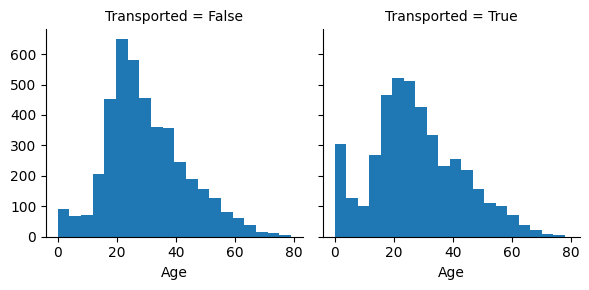

In [2021]:
g = sns.FacetGrid(train_df, col='Transported')
g.map(plt.hist, 'Age', bins=20)

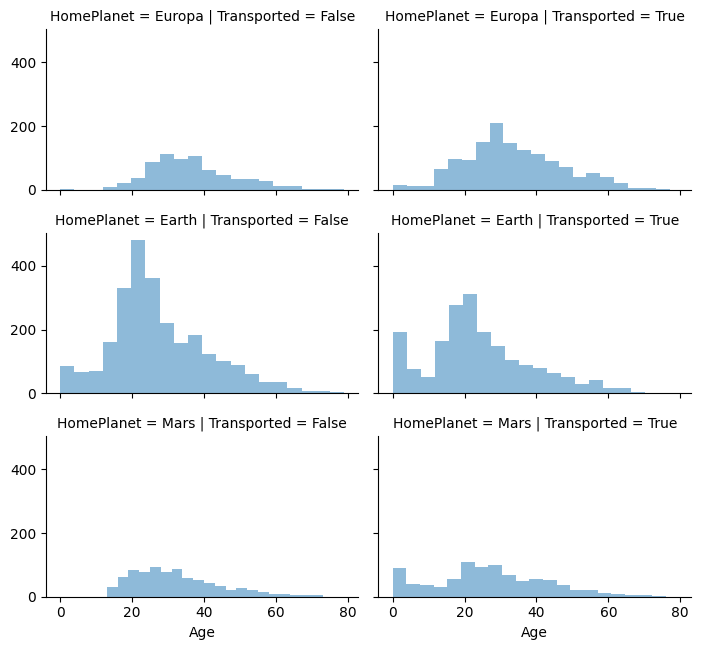

In [2022]:
grid = sns.FacetGrid(train_df, col='Transported', row='HomePlanet', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [2023]:
homeplanet_counts = train_df['HomePlanet'].value_counts()
print(homeplanet_counts)


HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


## Feature Engineering 

In [2024]:
train_df['group'] = train_df['PassengerId'].astype(str).str[:4]
train_df['group_placement'] = train_df['PassengerId'].astype(str).str[4:7]


test_df['group'] = test_df['PassengerId'].astype(str).str[:4]
test_df['group_placement'] = test_df['PassengerId'].astype(str).str[4:7]

train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported group group_placement  
0        False  0001             _01  
1         True  0002             _01  
2        False  0003             _01  
3        False  0003             _02  
4         True  0004             _01

In [2025]:
train_df['group'].value_counts()

train_df['is_alone'] = train_df['group'].map(train_df['group'].value_counts() == 1)
train_df['is_alone'] = train_df['is_alone'].map({True: 1, False: 0})
test_df['is_alone'] = test_df['group'].map(test_df['group'].value_counts() == 1)
test_df['is_alone'] = test_df['is_alone'].map({True: 1, False: 0})
train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported group group_placement  is_alone  
0        False  0001             _01         1  
1         True  0002             _01         1  
2        False  0003             _01         0  
3        False  0003             _02         0  
4         True  0004             _01         1

In [2026]:
train_df = train_df.drop(['PassengerId'], axis=1)
test_df = test_df.drop(['PassengerId'], axis=1)

In [2027]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
test_df['AgeBand'] = pd.cut(test_df['Age'], 5)
train_df[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Transported
0  (-0.079, 15.8]     0.648387
1    (15.8, 31.6]     0.474293
2    (31.6, 47.4]     0.485510
3    (47.4, 63.2]     0.486747
4    (63.2, 79.0]     0.463235

In [2028]:
train_df['Surname'] = train_df['Name'].str.split(' ', expand=True)[0]
test_df['Surname'] = test_df['Name'].str.split(' ', expand=True)[0]
combine = [train_df, test_df]

train_df['Name'] = train_df['Name'].str.split(' ', expand=True)[1]
test_df['Name'] = test_df['Name'].str.split(' ', expand=True)[1]

train_df.rename(columns={'Surname': 'Name', 'Name': 'Surname'}, inplace=True)
test_df.rename(columns={'Surname': 'Name', 'Name': 'Surname'}, inplace=True)



In [2029]:
train_df.head()

HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck      Surname  Transported group  \
0        0.0           0.0     0.0     0.0    Ofracculy        False  0001   
1        9.0          25.0   549.0    44.0        Vines         True  0002   
2     3576.0           0.0  6715.0    49.0       Susent        False  0003   
3     1283.0         371.0  3329.0   193.0       Susent        False  0003   
4       70.0         151.0   565.0     2.0  Santantines         True  0004   

  group_placement  is_alone       AgeBand    Name  
0             _01         1  (31.6, 47.4]   Maham  
1             _01         1  (15.8, 31.6]  Juanna  
2             _01         0  (47.4, 63.2]  Altark  
3             _02         0  (31.6, 47.4]   Solam  
4             _01         1  (15.8, 31.6]   Willy

In [2030]:
train_df['NameCategory'] = train_df['Name'].str[0].str.upper().apply(lambda x: ord(x) - 64 if isinstance(x, str) and len(x) == 1 else 0)
test_df['NameCategory'] = test_df['Name'].str[0].str.upper().apply(lambda x: ord(x) - 64 if isinstance(x, str) and len(x) == 1 else 0)

train_df['SurnameCategory'] = train_df['Surname'].str[0].str.upper().apply(lambda x: ord(x) - 64 if isinstance(x, str) and len(x) == 1 else 0)
test_df['SurnameCategory'] = test_df['Surname'].str[0].str.upper().apply(lambda x: ord(x) - 64 if isinstance(x, str) and len(x) == 1 else 0)

train_df['NameLength'] = train_df['Name'].apply(lambda x: len(x) if isinstance(x, str) else 0)
test_df['NameLength'] = test_df['Name'].apply(lambda x: len(x) if isinstance(x, str) else 0)

train_df['SurnameLength'] = train_df['Surname'].apply(lambda x: len(x) if isinstance(x, str) else 0)
test_df['SurnameLength'] = test_df['Surname'].apply(lambda x: len(x) if isinstance(x, str) else 0)


In [2031]:
train_df = train_df.drop(['Name', 'Surname'], axis=1)
test_df = test_df.drop(['Name', 'Surname'], axis=1)

In [2032]:


train_df['CryoSleep'] = train_df.groupby('group')['CryoSleep'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'SomeDefaultValue'))
test_df['CryoSleep'] = test_df.groupby('group')['CryoSleep'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'SomeDefaultValue'))


In [2033]:

train_df['CryoSleep'].value_counts()

CryoSleep
False               5508
True                3076
SomeDefaultValue     109
Name: count, dtype: int64

In [2034]:

filtered_df = train_df[train_df['CryoSleep'] != 'SomeDefaultValue']
correlation = filtered_df[['CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa']].corr()
print(correlation)

              CryoSleep  FoodCourt  ShoppingMall       Spa
CryoSleep      1.000000  -0.206622     -0.210308 -0.202232
FoodCourt     -0.206622   1.000000     -0.013828  0.221493
ShoppingMall  -0.210308  -0.013828      1.000000  0.014625
Spa           -0.202232   0.221493      0.014625  1.000000


In [2035]:
train_df['AnyService'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].gt(0).any(axis=1)
train_df.loc[train_df['CryoSleep'] == 'SomeDefaultValue', 'CryoSleep'] = ~train_df['AnyService']

test_df['AnyService'] = test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].gt(0).any(axis=1)    
test_df.loc[test_df['CryoSleep'] == 'SomeDefaultValue', 'CryoSleep'] = ~test_df['AnyService']

In [2036]:
train_df['CryoSleep'] = train_df['CryoSleep'].map({True: 1, False: 0})
test_df['CryoSleep'] = test_df['CryoSleep'].map({True: 1, False: 0})


In [2037]:
train_df.head()

HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa          0  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth          0  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa          0  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa          0  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth          0  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  ...  Transported  group group_placement  \
0        0.0           0.0     0.0  ...        False   0001             _01   
1        9.0          25.0   549.0  ...         True   0002             _01   
2     3576.0           0.0  6715.0  ...        False   0003             _01   
3     1283.0         371.0  3329.0  ...        False   0003             _02   
4       70.0         151.0   565.0  ...         True   0004             _01   

  is_alone       AgeBand NameCategory  SurnameCategory  NameLength  \
0        1  (31.6, 47.4]           13               15           5   
1        1  (15.8, 31.6]           10               22           6   
2        0  (47.4, 63.2]            1               19           6   
3        0  (31.6, 47.4]           19               19           5   
4        1  (15.8, 31.6]           23               19           5   

   SurnameLength  AnyService  
0              9       False  
1              5        True  
2              6        True  
3              6        True  
4             11        True  

[5 rows x 21 columns]

In [2038]:
train_df['RoomServiceBand'] = pd.cut(train_df['RoomService'], 5)
test_df['RoomServiceBand'] = pd.cut(test_df['RoomService'], 5)
train_df[['RoomServiceBand', 'Transported']].groupby(['RoomServiceBand'], as_index=False).mean().sort_values(by='RoomServiceBand', ascending=True)

RoomServiceBand  Transported
0   (-14.327, 2865.4]     0.509869
1    (2865.4, 5730.8]     0.085366
2    (5730.8, 8596.2]     0.000000
3   (8596.2, 11461.6]     0.000000
4  (11461.6, 14327.0]     0.000000

In [2039]:
train_df['FoodCourtBand'] = pd.cut(train_df['FoodCourt'], 5)
test_df['FoodCourtBand'] = pd.cut(test_df['FoodCourt'], 5)
train_df[['FoodCourtBand', 'Transported']].groupby(['FoodCourtBand'], as_index=False).mean().sort_values(by='FoodCourtBand', ascending=True)

FoodCourtBand  Transported
0   (-29.813, 5962.6]     0.500000
1   (5962.6, 11925.2]     0.631579
2  (11925.2, 17887.8]     0.708333
3  (17887.8, 23850.4]     1.000000
4  (23850.4, 29813.0]     1.000000

In [2040]:
train_df['ShoppingMallBand'] = pd.cut(train_df['ShoppingMall'], 5)
test_df['ShoppingMallBand'] = pd.cut(test_df['ShoppingMall'], 5)
train_df[['ShoppingMallBand', 'Transported']].groupby(['ShoppingMallBand'], as_index=False).mean().sort_values(by='ShoppingMallBand', ascending=True)

ShoppingMallBand  Transported
0   (-23.492, 4698.4]     0.501713
1    (4698.4, 9396.8]     0.888889
2   (9396.8, 14095.2]     0.333333
3  (14095.2, 18793.6]          NaN
4  (18793.6, 23492.0]     1.000000

In [2041]:
train_df['SpaBand'] = pd.cut(train_df['Spa'], 5)
test_df['SpaBand'] = pd.cut(test_df['Spa'], 5)
train_df[['SpaBand', 'Transported']].groupby(['SpaBand'], as_index=False).mean().sort_values(by='SpaBand', ascending=True)

SpaBand  Transported
0   (-22.408, 4481.6]     0.511331
1    (4481.6, 8963.2]     0.000000
2   (8963.2, 13444.8]     0.000000
3  (13444.8, 17926.4]     0.000000
4  (17926.4, 22408.0]     0.000000

In [2042]:
train_df['VRDeckBand'] = pd.cut(train_df['VRDeck'], 5)
test_df['VRDeckBand'] = pd.cut(test_df['VRDeck'], 5)
train_df[['VRDeckBand', 'Transported']].groupby(['VRDeckBand'], as_index=False).mean().sort_values(by='VRDeckBand', ascending=True)

VRDeckBand  Transported
0   (-24.133, 4826.6]     0.510134
1    (4826.6, 9653.2]     0.011628
2   (9653.2, 14479.8]     0.000000
3  (14479.8, 19306.4]     0.000000
4  (19306.4, 24133.0]     0.000000

In [2043]:
train_df['TotalMoneySpent'] = train_df['Spa'] + train_df['VRDeck'] + train_df['ShoppingMall'] + train_df['RoomService']
test_df['TotalMoneySpent'] = test_df['Spa'] + test_df['VRDeck'] + test_df['ShoppingMall'] + test_df['RoomService']

train_df['TotalMoneySpent1'] = train_df['Spa'] + train_df['VRDeck'] + train_df['ShoppingMall'] + train_df['RoomService'] + train_df['FoodCourt']
test_df['TotalMoneySpent1'] = test_df['Spa'] + test_df['VRDeck'] + test_df['ShoppingMall'] + test_df['RoomService'] + test_df['FoodCourt']

train_df['TotalMoneySpentBand'] = pd.cut(train_df['TotalMoneySpent'], 5)
test_df['TotalMoneySpentBand'] = pd.cut(test_df['TotalMoneySpent'], 5)

train_df[['TotalMoneySpentBand', 'Transported']].groupby(['TotalMoneySpentBand'], as_index=False).mean().sort_values(by='TotalMoneySpentBand', ascending=True)


TotalMoneySpentBand  Transported
0     (-28.6, 5720.0]     0.518321
1   (5720.0, 11440.0]     0.068627
2  (11440.0, 17160.0]     0.026316
3  (17160.0, 22880.0]     0.000000
4  (22880.0, 28600.0]     0.500000

In [2044]:

train_df['TotalMoneySpentBand1'] = pd.cut(train_df['TotalMoneySpent1'], 5)
test_df['TotalMoneySpentBand1'] = pd.cut(test_df['TotalMoneySpent1'], 5)
train_df[['TotalMoneySpentBand1', 'Transported']].groupby(['TotalMoneySpentBand1'], as_index=False).mean().sort_values(by='TotalMoneySpentBand1', ascending=True)

TotalMoneySpentBand1  Transported
0    (-35.987, 7197.4]     0.511890
1    (7197.4, 14394.8]     0.293436
2   (14394.8, 21592.2]     0.317460
3   (21592.2, 28789.6]     0.266667
4   (28789.6, 35987.0]     0.400000

In [2045]:
train_df = train_df.drop(['Spa', 'RoomService', 'VRDeck', 'Age', 'ShoppingMall', 'FoodCourt', 'TotalMoneySpent', 'TotalMoneySpent1'], axis=1)
test_df = test_df.drop([ 'Spa', 'RoomService', 'VRDeck', 'Age', 'ShoppingMall', 'FoodCourt', 'TotalMoneySpent', 'TotalMoneySpent1'], axis=1)
train_df.head()

HomePlanet  CryoSleep  Cabin  Destination    VIP  Transported group  \
0     Europa          0  B/0/P  TRAPPIST-1e  False        False  0001   
1      Earth          0  F/0/S  TRAPPIST-1e  False         True  0002   
2     Europa          0  A/0/S  TRAPPIST-1e   True        False  0003   
3     Europa          0  A/0/S  TRAPPIST-1e  False        False  0003   
4      Earth          0  F/1/S  TRAPPIST-1e  False         True  0004   

  group_placement  is_alone       AgeBand  ...  NameLength  SurnameLength  \
0             _01         1  (31.6, 47.4]  ...           5              9   
1             _01         1  (15.8, 31.6]  ...           6              5   
2             _01         0  (47.4, 63.2]  ...           6              6   
3             _02         0  (31.6, 47.4]  ...           5              6   
4             _01         1  (15.8, 31.6]  ...           5             11   

   AnyService    RoomServiceBand      FoodCourtBand   ShoppingMallBand  \
0       False  (-14.327, 2865.4]  (-29.813, 5962.6]  (-23.492, 4698.4]   
1        True  (-14.327, 2865.4]  (-29.813, 5962.6]  (-23.492, 4698.4]   
2        True  (-14.327, 2865.4]  (-29.813, 5962.6]  (-23.492, 4698.4]   
3        True  (-14.327, 2865.4]  (-29.813, 5962.6]  (-23.492, 4698.4]   
4        True  (-14.327, 2865.4]  (-29.813, 5962.6]  (-23.492, 4698.4]   

             SpaBand         VRDeckBand TotalMoneySpentBand  \
0  (-22.408, 4481.6]  (-24.133, 4826.6]     (-28.6, 5720.0]   
1  (-22.408, 4481.6]  (-24.133, 4826.6]     (-28.6, 5720.0]   
2   (4481.6, 8963.2]  (-24.133, 4826.6]   (5720.0, 11440.0]   
3  (-22.408, 4481.6]  (-24.133, 4826.6]     (-28.6, 5720.0]   
4  (-22.408, 4481.6]  (-24.133, 4826.6]     (-28.6, 5720.0]   

  TotalMoneySpentBand1  
0    (-35.987, 7197.4]  
1    (-35.987, 7197.4]  
2    (7197.4, 14394.8]  
3    (-35.987, 7197.4]  
4    (-35.987, 7197.4]  

[5 rows x 22 columns]

Lets look into the Cabin

In [2046]:
# Split the Cabin column into three new columns
train_df[['deck', 'cabin_number', 'side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['deck', 'cabin_number', 'side']] = test_df['Cabin'].str.split('/', expand=True)

# Drop the original Cabin column
train_df = train_df.drop('Cabin', axis=1)   
test_df = test_df.drop('Cabin', axis=1)

# Display the updated dataframe
train_df.head()


HomePlanet  CryoSleep  Destination    VIP  Transported group  \
0     Europa          0  TRAPPIST-1e  False        False  0001   
1      Earth          0  TRAPPIST-1e  False         True  0002   
2     Europa          0  TRAPPIST-1e   True        False  0003   
3     Europa          0  TRAPPIST-1e  False        False  0003   
4      Earth          0  TRAPPIST-1e  False         True  0004   

  group_placement  is_alone       AgeBand  NameCategory  ...  \
0             _01         1  (31.6, 47.4]            13  ...   
1             _01         1  (15.8, 31.6]            10  ...   
2             _01         0  (47.4, 63.2]             1  ...   
3             _02         0  (31.6, 47.4]            19  ...   
4             _01         1  (15.8, 31.6]            23  ...   

     RoomServiceBand      FoodCourtBand   ShoppingMallBand            SpaBand  \
0  (-14.327, 2865.4]  (-29.813, 5962.6]  (-23.492, 4698.4]  (-22.408, 4481.6]   
1  (-14.327, 2865.4]  (-29.813, 5962.6]  (-23.492, 4698.4]  (-22.408, 4481.6]   
2  (-14.327, 2865.4]  (-29.813, 5962.6]  (-23.492, 4698.4]   (4481.6, 8963.2]   
3  (-14.327, 2865.4]  (-29.813, 5962.6]  (-23.492, 4698.4]  (-22.408, 4481.6]   
4  (-14.327, 2865.4]  (-29.813, 5962.6]  (-23.492, 4698.4]  (-22.408, 4481.6]   

          VRDeckBand TotalMoneySpentBand TotalMoneySpentBand1 deck  \
0  (-24.133, 4826.6]     (-28.6, 5720.0]    (-35.987, 7197.4]    B   
1  (-24.133, 4826.6]     (-28.6, 5720.0]    (-35.987, 7197.4]    F   
2  (-24.133, 4826.6]   (5720.0, 11440.0]    (7197.4, 14394.8]    A   
3  (-24.133, 4826.6]     (-28.6, 5720.0]    (-35.987, 7197.4]    A   
4  (-24.133, 4826.6]     (-28.6, 5720.0]    (-35.987, 7197.4]    F   

  cabin_number side  
0            0    P  
1            0    S  
2            0    S  
3            0    S  
4            1    S  

[5 rows x 24 columns]

In [2047]:
train_df[['deck', 'Transported']].groupby(['deck'], as_index=False).mean().sort_values(by='Transported', ascending=False)

deck  Transported
1    B     0.734275
2    C     0.680054
6    G     0.516217
0    A     0.496094
5    F     0.439871
3    D     0.433054
4    E     0.357306
7    T     0.200000

In [2048]:
train_df[['side', 'Transported']].groupby(['side'], as_index=False).mean().sort_values(by='Transported', ascending=False)

side  Transported
1    S     0.555037
0    P     0.451260

In [2049]:
train_df['side'] = train_df['side'].replace({'P': int(0), 'S': int(1)})
test_df['side'] = test_df['side'].replace({'P': int(0), 'S': int(1)})


In [2050]:
null_side_count_train = train_df['side'].isnull().sum()
half_count_train = null_side_count_train // 2

null_side_count_test = test_df['side'].isnull().sum()
half_count_test = null_side_count_test // 2

train_df.loc[train_df['side'].isnull(), 'side'] = [1] * half_count_train + [0] * (null_side_count_train - half_count_train)
test_df.loc[test_df['side'].isnull(), 'side'] = [1] * half_count_test + [0] * (null_side_count_test - half_count_test)

In [2051]:
train_df['AgeBand'] = train_df['AgeBand'].cat.codes
test_df['AgeBand'] = test_df['AgeBand'].cat.codes

train_df['RoomServiceBand'] = train_df['RoomServiceBand'].cat.codes
test_df['RoomServiceBand'] = test_df['RoomServiceBand'].cat.codes

train_df['FoodCourtBand'] = train_df['FoodCourtBand'].cat.codes
test_df['FoodCourtBand'] = test_df['FoodCourtBand'].cat.codes

train_df['ShoppingMallBand'] = train_df['ShoppingMallBand'].cat.codes
test_df['ShoppingMallBand'] = test_df['ShoppingMallBand'].cat.codes

train_df['SpaBand'] = train_df['SpaBand'].cat.codes
test_df['SpaBand'] = test_df['SpaBand'].cat.codes

train_df['VRDeckBand'] = train_df['VRDeckBand'].cat.codes
test_df['VRDeckBand'] = test_df['VRDeckBand'].cat.codes

train_df['TotalMoneySpentBand'] = train_df['TotalMoneySpentBand'].cat.codes
test_df['TotalMoneySpentBand'] = test_df['TotalMoneySpentBand'].cat.codes

train_df['TotalMoneySpentBand1'] = train_df['TotalMoneySpentBand1'].cat.codes
test_df['TotalMoneySpentBand1'] = test_df['TotalMoneySpentBand1'].cat.codes

train_df.head()


HomePlanet  CryoSleep  Destination    VIP  Transported group  \
0     Europa          0  TRAPPIST-1e  False        False  0001   
1      Earth          0  TRAPPIST-1e  False         True  0002   
2     Europa          0  TRAPPIST-1e   True        False  0003   
3     Europa          0  TRAPPIST-1e  False        False  0003   
4      Earth          0  TRAPPIST-1e  False         True  0004   

  group_placement  is_alone  AgeBand  NameCategory  ...  RoomServiceBand  \
0             _01         1        2            13  ...                0   
1             _01         1        1            10  ...                0   
2             _01         0        3             1  ...                0   
3             _02         0        2            19  ...                0   
4             _01         1        1            23  ...                0   

   FoodCourtBand  ShoppingMallBand  SpaBand  VRDeckBand  TotalMoneySpentBand  \
0              0                 0        0           0                    0   
1              0                 0        0           0                    0   
2              0                 0        1           0                    1   
3              0                 0        0           0                    0   
4              0                 0        0           0                    0   

   TotalMoneySpentBand1  deck  cabin_number  side  
0                     0     B             0   0.0  
1                     0     F             0   1.0  
2                     1     A             0   1.0  
3                     0     A             0   1.0  
4                     0     F             1   1.0  

[5 rows x 24 columns]

In [2052]:

train_df['socioeconomics'] = train_df.apply(lambda row: 4 if row['VIP'] else row['TotalMoneySpentBand'], axis=1)
test_df['socioeconomics'] = test_df.apply(lambda row: 4 if row['VIP'] else row['TotalMoneySpentBand'], axis=1)

train_df['socioeconomics'].value_counts()   


socioeconomics
 0    7351
-1     715
 4     404
 1     179
 2      32
 3      12
Name: count, dtype: int64

In [2053]:
train_df = train_df.drop(['VIP', 'TotalMoneySpentBand'], axis=1)
test_df = test_df.drop(['VIP', 'TotalMoneySpentBand'], axis=1)

In [2054]:
train_df['group_placement'] = train_df['group_placement'].astype(str).str[-1].astype(int)
test_df['group_placement'] = test_df['group_placement'].astype(str).str[-1].astype(int)

train_df.head()

HomePlanet  CryoSleep  Destination  Transported group  group_placement  \
0     Europa          0  TRAPPIST-1e        False  0001                1   
1      Earth          0  TRAPPIST-1e         True  0002                1   
2     Europa          0  TRAPPIST-1e        False  0003                1   
3     Europa          0  TRAPPIST-1e        False  0003                2   
4      Earth          0  TRAPPIST-1e         True  0004                1   

   is_alone  AgeBand  NameCategory  SurnameCategory  ...  RoomServiceBand  \
0         1        2            13               15  ...                0   
1         1        1            10               22  ...                0   
2         0        3             1               19  ...                0   
3         0        2            19               19  ...                0   
4         1        1            23               19  ...                0   

   FoodCourtBand  ShoppingMallBand  SpaBand  VRDeckBand  TotalMoneySpentBand1  \
0              0                 0        0           0                     0   
1              0                 0        0           0                     0   
2              0                 0        1           0                     1   
3              0                 0        0           0                     0   
4              0                 0        0           0                     0   

   deck  cabin_number  side socioeconomics  
0     B             0   0.0              0  
1     F             0   1.0              0  
2     A             0   1.0              4  
3     A             0   1.0              0  
4     F             1   1.0              0  

[5 rows x 23 columns]

In [2055]:
train_df['group'] = train_df['group'].astype(int)
test_df['group'] = test_df['group'].astype(int)


train_df.head() 

HomePlanet  CryoSleep  Destination  Transported  group  group_placement  \
0     Europa          0  TRAPPIST-1e        False      1                1   
1      Earth          0  TRAPPIST-1e         True      2                1   
2     Europa          0  TRAPPIST-1e        False      3                1   
3     Europa          0  TRAPPIST-1e        False      3                2   
4      Earth          0  TRAPPIST-1e         True      4                1   

   is_alone  AgeBand  NameCategory  SurnameCategory  ...  RoomServiceBand  \
0         1        2            13               15  ...                0   
1         1        1            10               22  ...                0   
2         0        3             1               19  ...                0   
3         0        2            19               19  ...                0   
4         1        1            23               19  ...                0   

   FoodCourtBand  ShoppingMallBand  SpaBand  VRDeckBand  TotalMoneySpentBand1  \
0              0                 0        0           0                     0   
1              0                 0        0           0                     0   
2              0                 0        1           0                     1   
3              0                 0        0           0                     0   
4              0                 0        0           0                     0   

   deck  cabin_number  side socioeconomics  
0     B             0   0.0              0  
1     F             0   1.0              0  
2     A             0   1.0              4  
3     A             0   1.0              0  
4     F             1   1.0              0  

[5 rows x 23 columns]

In [2056]:
train_df['Destination'].value_counts()  

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [2057]:
# Check if there are others in the group
train_df['HomePlanet'] = train_df.groupby('group')['HomePlanet'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else train_df['HomePlanet'].mode()[0]))
test_df['HomePlanet'] = test_df.groupby('group')['HomePlanet'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else test_df['HomePlanet'].mode()[0]))

# Use the most frequent home planet for individuals with null values and no others in the group
train_df['HomePlanet'] = train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0])
test_df['HomePlanet'] = test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0])

# Display the updated dataframe
train_df.head()


HomePlanet  CryoSleep  Destination  Transported  group  group_placement  \
0     Europa          0  TRAPPIST-1e        False      1                1   
1      Earth          0  TRAPPIST-1e         True      2                1   
2     Europa          0  TRAPPIST-1e        False      3                1   
3     Europa          0  TRAPPIST-1e        False      3                2   
4      Earth          0  TRAPPIST-1e         True      4                1   

   is_alone  AgeBand  NameCategory  SurnameCategory  ...  RoomServiceBand  \
0         1        2            13               15  ...                0   
1         1        1            10               22  ...                0   
2         0        3             1               19  ...                0   
3         0        2            19               19  ...                0   
4         1        1            23               19  ...                0   

   FoodCourtBand  ShoppingMallBand  SpaBand  VRDeckBand  TotalMoneySpentBand1  \
0              0                 0        0           0                     0   
1              0                 0        0           0                     0   
2              0                 0        1           0                     1   
3              0                 0        0           0                     0   
4              0                 0        0           0                     0   

   deck  cabin_number  side socioeconomics  
0     B             0   0.0              0  
1     F             0   1.0              0  
2     A             0   1.0              4  
3     A             0   1.0              0  
4     F             1   1.0              0  

[5 rows x 23 columns]

In [2058]:
# Check if there are others in the group with a non-null destination
train_df['Destination'] = train_df.groupby('group')['Destination'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else train_df['Destination'].mode()[0]))
test_df['Destination'] = test_df.groupby('group')['Destination'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else test_df['Destination'].mode()[0]))

# Use the most frequent destination for individuals with null values and no others in the group
train_df['Destination'] = train_df['Destination'].fillna(train_df['Destination'].mode()[0])
test_df['Destination'] = test_df['Destination'].fillna(test_df['Destination'].mode()[0])

# Display the updated dataframe
train_df.head()


HomePlanet  CryoSleep  Destination  Transported  group  group_placement  \
0     Europa          0  TRAPPIST-1e        False      1                1   
1      Earth          0  TRAPPIST-1e         True      2                1   
2     Europa          0  TRAPPIST-1e        False      3                1   
3     Europa          0  TRAPPIST-1e        False      3                2   
4      Earth          0  TRAPPIST-1e         True      4                1   

   is_alone  AgeBand  NameCategory  SurnameCategory  ...  RoomServiceBand  \
0         1        2            13               15  ...                0   
1         1        1            10               22  ...                0   
2         0        3             1               19  ...                0   
3         0        2            19               19  ...                0   
4         1        1            23               19  ...                0   

   FoodCourtBand  ShoppingMallBand  SpaBand  VRDeckBand  TotalMoneySpentBand1  \
0              0                 0        0           0                     0   
1              0                 0        0           0                     0   
2              0                 0        1           0                     1   
3              0                 0        0           0                     0   
4              0                 0        0           0                     0   

   deck  cabin_number  side socioeconomics  
0     B             0   0.0              0  
1     F             0   1.0              0  
2     A             0   1.0              4  
3     A             0   1.0              0  
4     F             1   1.0              0  

[5 rows x 23 columns]

In [2059]:
train_df['deck'] = train_df.groupby('group')['deck'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test_df['deck'] = test_df.groupby('group')['deck'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


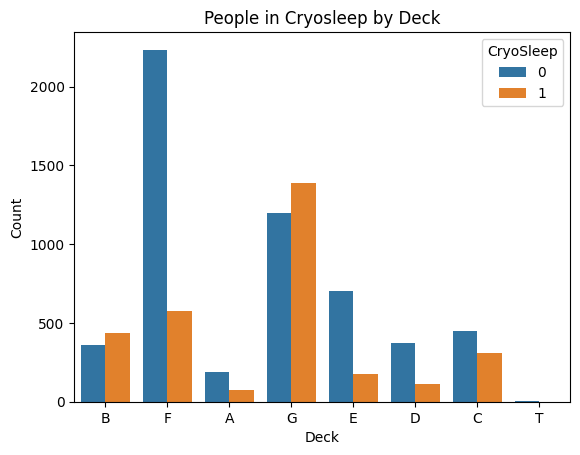

In [2060]:

sns.countplot(data=train_df, x='deck', hue='CryoSleep')
plt.title('People in Cryosleep by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.show()


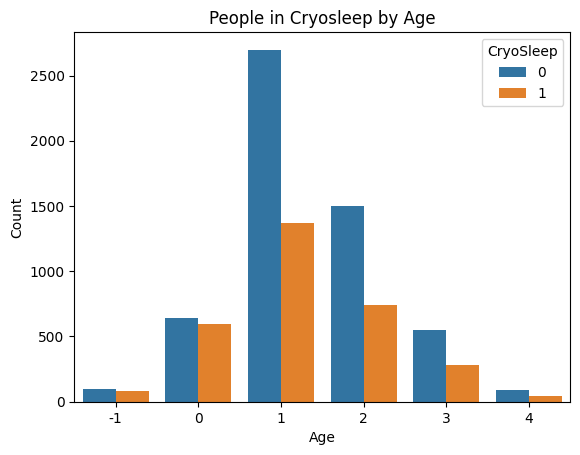

In [2061]:
sns.countplot(data=train_df, x='AgeBand', hue='CryoSleep')
plt.title('People in Cryosleep by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [2062]:
train_df['AgeCryoSleep'] = train_df['AgeBand'] * train_df['CryoSleep']
test_df['AgeCryoSleep'] = test_df['AgeBand'] * test_df['CryoSleep']


In [2063]:
# Check if deck is null and CryoSleep is 0
null_deck_cryosleep_0 = train_df[(train_df['deck'].isnull()) & (train_df['CryoSleep'] == 0)]

# Calculate the number of passengers to distribute to G deck and F deck
num_passengers = len(null_deck_cryosleep_0)
num_passengers_g_deck = num_passengers // 3
num_passengers_f_deck = num_passengers - num_passengers_g_deck

# Assign G deck to a subset of passengers
train_df.loc[(train_df['deck'].isnull()) & (train_df['CryoSleep'] == 0), 'deck'] = 'G'

# Assign F deck to the remaining subset of passengers
train_df.loc[(train_df['deck'].isnull()) & (train_df['CryoSleep'] == 0), 'deck'] = 'F'



In [2064]:
# Check if deck is null and has a destination
null_deck_with_destination = train_df[train_df['deck'].isnull() & train_df['Destination'].notnull()]

# Assign the most frequent deck for each destination
for destination in null_deck_with_destination['Destination'].unique():
    most_frequent_deck = train_df[train_df['Destination'] == destination]['deck'].mode()[0]
    train_df.loc[(train_df['deck'].isnull()) & (train_df['Destination'] == destination), 'deck'] = most_frequent_deck

# Calculate the number of passengers with null deck and no destination
null_deck_no_destination_count = len(train_df[train_df['deck'].isnull() & train_df['Destination'].isnull()])

# Calculate the number of decks
num_decks = len(train_df['deck'].unique())

# Calculate the number of passengers to distribute to each deck
num_passengers_per_deck = null_deck_no_destination_count // num_decks

# Assign decks to the remaining passengers
remaining_passengers = null_deck_no_destination_count % num_decks
decks = train_df['deck'].unique()

for i in range(remaining_passengers):
    train_df.loc[(train_df['deck'].isnull()) & (train_df['Destination'].isnull()), 'deck'] = decks[i]

for i in range(remaining_passengers, num_decks):
    train_df.loc[(train_df['deck'].isnull()) & (train_df['Destination'].isnull()), 'deck'] = decks[i]


In [2065]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8693 non-null   object 
 1   CryoSleep             8693 non-null   int64  
 2   Destination           8693 non-null   object 
 3   Transported           8693 non-null   bool   
 4   group                 8693 non-null   int64  
 5   group_placement       8693 non-null   int64  
 6   is_alone              8693 non-null   int64  
 7   AgeBand               8693 non-null   int8   
 8   NameCategory          8693 non-null   int64  
 9   SurnameCategory       8693 non-null   int64  
 10  NameLength            8693 non-null   int64  
 11  SurnameLength         8693 non-null   int64  
 12  AnyService            8693 non-null   bool   
 13  RoomServiceBand       8693 non-null   int8   
 14  FoodCourtBand         8693 non-null   int8   
 15  ShoppingMallBand     

In [2066]:
train_df['HomePlanet'] = train_df['HomePlanet'].replace({'Earth': int(0), 'Mars': int(1), 'Europa' : int(2)})
test_df['HomePlanet'] = test_df['HomePlanet'].replace({'Earth': int(0), 'Mars': int(1), 'Europa' : int(2)})

train_df['Destination'] = train_df['Destination'].replace({'TRAPPIST-1e': int(0), '55 Cancri e': int(1), 'PSO J318.5-22' : int(2)})
test_df['Destination'] = test_df['Destination'].replace({'TRAPPIST-1e': int(0), '55 Cancri e': int(1), 'PSO J318.5-22' : int(2)})

train_df['deck'] = train_df['deck'].replace({'A': int(0), 'B': int(1), 'C' : int(2), 'D' : int(3), 'E' : int(4), 'F' : int(5), 'G' : int(6), 'T' : int(7)})
test_df['deck'] = test_df['deck'].replace({'A': int(0), 'B': int(1), 'C' : int(2), 'D' : int(3), 'E' : int(4), 'F' : int(5), 'G' : int(6), 'T' : int(7)})

In [2067]:

X_train = train_df.drop(["Transported", 'TotalMoneySpentBand1', 'RoomServiceBand', 'cabin_number', 'group', 'FoodCourtBand', 'is_alone', 'ShoppingMallBand'], axis=1)
Y_train = train_df["Transported"]
X_test  = test_df.drop(['TotalMoneySpentBand1', 'RoomServiceBand', 'cabin_number', 'group', 'FoodCourtBand', 'is_alone', 'ShoppingMallBand'], axis=1)
X_train.shape, Y_train.shape, X_test.shape

((8693, 16), (8693,), (4277, 16))

In [2068]:
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.svm import SVC, LinearSVC, NuSVC
models = list()


#here is the list of the models we'll try 

models.append(LogisticRegression())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(SVC())
models.append(ExtraTreesClassifier())
models.append(GradientBoostingClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1))
models.append(KNeighborsClassifier())
models.append(XGBClassifier())
models.append(MLPClassifier())
models.append(lgb.LGBMClassifier())

kfold = 5

In [2069]:
cv_results = []
cv_names = []

for model in models :
        
        cv_results.append(cross_val_score(model, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
        cv_names.append(model.__class__.__name__)
        print(f"{model.__class__.__name__}")
      
cv_result = pd.DataFrame(cv_results, cv_names)

cv_result["mean"] = cv_result.mean(axis=1)
cv_result["std"] = cv_result.std(axis=1)

cv_result.head(9)

/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

LogisticRegression
DecisionTreeClassifier
RandomForestClassifier
SVC
ExtraTreesClassifier
GradientBoostingClassifier


/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

AdaBoostClassifier
KNeighborsClassifier
XGBClassifier


/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Number of positive: 3503, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

0         1         2         3         4  \
LogisticRegression          0.728580  0.744681  0.722254  0.750288  0.734753   
DecisionTreeClassifier      0.642323  0.657274  0.672800  0.643268  0.684695   
RandomForestClassifier      0.710753  0.726855  0.717079  0.716341  0.733026   
SVC                         0.729155  0.733755  0.721679  0.752014  0.747986   
ExtraTreesClassifier        0.693502  0.703853  0.705578  0.703682  0.718067   
GradientBoostingClassifier  0.740081  0.755607  0.741806  0.756617  0.753740   
AdaBoostClassifier          0.676251  0.667050  0.650374  0.661105  0.678941   
KNeighborsClassifier        0.667625  0.686026  0.646348  0.657652  0.668009   
XGBClassifier               0.703853  0.723404  0.722829  0.714039  0.733602   

                                mean       std  
LogisticRegression          0.736111  0.010247  
DecisionTreeClassifier      0.660072  0.016574  
RandomForestClassifier      0.720811  0.008010  
SVC                         0.736918  0.011427  
ExtraTreesClassifier        0.704936  0.007827  
GradientBoostingClassifier  0.749570  0.007125  
AdaBoostClassifier          0.666744  0.010383  
KNeighborsClassifier        0.665132  0.013114  
XGBClassifier               0.719545  0.009998

In [2070]:
cv_res = pd.DataFrame({"CrossValMeans":cv_result['mean'],"CrossValerrors": cv_result['std'],"Algorithm":cv_names})

cv_res['criterion'] = cv_res.CrossValMeans - cv_res.CrossValerrors/2
cv_res.sort_values(by='criterion', ascending=False)

CrossValMeans  CrossValerrors  \
GradientBoostingClassifier       0.749570        0.007125   
LGBMClassifier                   0.741978        0.008593   
SVC                              0.736918        0.011427   
LogisticRegression               0.736111        0.010247   
MLPClassifier                    0.730014        0.007661   
RandomForestClassifier           0.720811        0.008010   
XGBClassifier                    0.719545        0.009998   
ExtraTreesClassifier             0.704936        0.007827   
AdaBoostClassifier               0.666744        0.010383   
KNeighborsClassifier             0.665132        0.013114   
DecisionTreeClassifier           0.660072        0.016574   

                                             Algorithm  criterion  
GradientBoostingClassifier  GradientBoostingClassifier   0.746007  
LGBMClassifier                          LGBMClassifier   0.737681  
SVC                                                SVC   0.731204  
LogisticRegression                  LogisticRegression   0.730988  
MLPClassifier                            MLPClassifier   0.726184  
RandomForestClassifier          RandomForestClassifier   0.716806  
XGBClassifier                            XGBClassifier   0.714546  
ExtraTreesClassifier              ExtraTreesClassifier   0.701023  
AdaBoostClassifier                  AdaBoostClassifier   0.661553  
KNeighborsClassifier              KNeighborsClassifier   0.658576  
DecisionTreeClassifier          DecisionTreeClassifier   0.651785

In [2072]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100)



search_space_GB = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.02],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'max_features': [1.0, 0.3, 0.1]
    }

GS_GRB = GridSearchCV(
    estimator=gradient_boosting,
    param_grid=search_space_GB, 
    cv=kfold, 
    scoring= 'accuracy', 
    n_jobs=4
    )
GS_GRB.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.05, 0.02],
                         'max_depth': [4, 6], 'max_features': [1.0, 0.3, 0.1],
                         'min_samples_leaf': [3, 5, 9, 17],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [2073]:
lightgbm = lgb.LGBMClassifier()

search_space_lgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'subsample': [0.5, 0.7, 1.0],
    'max_depth': [3, 7, 9]
}

GS_LGBM = GridSearchCV(
    estimator=lightgbm,
    param_grid=search_space_lgb, 
    cv=kfold, 
    scoring= 'accuracy', 
    n_jobs= 4
    )
GS_LGBM.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 16
[LightGBM] [Info] [binary:Bo

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 7, 9],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [2074]:
SVC = SVC(probability=True)
search_space_SVC = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
GS_SVC = GridSearchCV(
    estimator=SVC,
    param_grid=search_space_SVC, 
    cv=kfold, 
    scoring= 'accuracy', 
    n_jobs=4
    )
GS_SVC.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [2075]:
LR = LogisticRegression()

search_space_LR = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(0, 4, 10)
}

GS_LR = GridSearchCV(
    estimator=LR,
    param_grid=search_space_LR, 
    cv=kfold, 
    scoring= 'accuracy', 
    n_jobs=-1
    )
GS_LR.fit(X_train, Y_train)

/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [2076]:
MLPC = MLPClassifier()

search_space_MLPC = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

GS_MLPC = GridSearchCV(
    estimator=MLPC,
    param_grid=search_space_MLPC, 
    cv=kfold, 
    scoring= 'accuracy', 
    n_jobs=-1
    )
GS_MLPC.fit(X_train, Y_train)

/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

rary/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [2077]:
random_forest = RandomForestClassifier(n_estimators=100)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1400, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 20, num = 5)]
max_depth.append(None)
min_samples_split = [ 5, 10]
min_samples_leaf = [ 2, 4]
bootstrap = [True, False]

search_space_RF = {
    'n_estimators': n_estimators,
    'criterion': ['gini'],
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
}
GS_RF = GridSearchCV(
    estimator=random_forest,
    param_grid=search_space_RF, 
    cv=5, 
    scoring= 'accuracy', 
    n_jobs= 4
    )
GS_RF.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'criterion': ['gini'],
                         'max_depth': [1, 5, 10, 15, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [200, 600, 1000, 1400]},
             scoring='accuracy')

In [2080]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       4277 non-null   int64  
 1   CryoSleep        4277 non-null   int64  
 2   Destination      4277 non-null   int64  
 3   group_placement  4277 non-null   int64  
 4   AgeBand          4277 non-null   int8   
 5   NameCategory     4277 non-null   int64  
 6   SurnameCategory  4277 non-null   int64  
 7   NameLength       4277 non-null   int64  
 8   SurnameLength    4277 non-null   int64  
 9   AnyService       4277 non-null   bool   
 10  SpaBand          4277 non-null   int8   
 11  VRDeckBand       4277 non-null   int8   
 12  deck             4214 non-null   float64
 13  side             4277 non-null   float64
 14  socioeconomics   4277 non-null   int64  
 15  AgeCryoSleep     4277 non-null   int64  
dtypes: bool(1), float64(2), int64(10), int8(3)
memory usage: 417

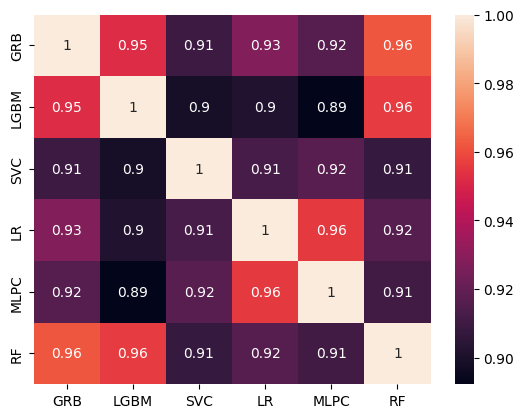

In [2081]:

X_test_filled = X_test.fillna(X_test.mean())




test_Survived_GRB = pd.Series(GS_GRB.best_estimator_.predict(X_test_filled), name="GRB")
test_Survived_LGBM = pd.Series(GS_LGBM.best_estimator_.predict(X_test_filled), name="LGBM")
test_Survived_SVC = pd.Series(GS_SVC.best_estimator_.predict(X_test_filled), name="SVC")
test_Survived_LR = pd.Series(GS_LR.best_estimator_.predict(X_test_filled), name="LR")
test_Survived_MLPC = pd.Series(GS_MLPC.best_estimator_.predict(X_test_filled), name="MLPC")
test_Survived_RF = pd.Series(GS_RF.best_estimator_.predict(X_test_filled), name="RF")

ensemble_results = pd.concat([test_Survived_GRB,test_Survived_LGBM,test_Survived_SVC, test_Survived_LR, test_Survived_MLPC, test_Survived_RF],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)


In [2083]:
from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('LR', GS_LR.best_estimator_), 
('GRB', GS_GRB.best_estimator_), ('LGBM', GS_LGBM.best_estimator_), ('MLPC', GS_MLPC.best_estimator_), ("RandomForest",GS_RF.best_estimator_), ('SVC', GS_SVC.best_estimator_)], voting='hard', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)
votingC.score(X_train, Y_train)

/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


/Users/iddobloch/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7583112849419072

In [2084]:
# Create a Random Forest classifier with the best parameters
best_random_forest = RandomForestClassifier(n_estimators=GS_RF.best_params_['n_estimators'],
                                             criterion=GS_RF.best_params_['criterion'],
                                             bootstrap=GS_RF.best_params_['bootstrap'],
                                             max_depth=GS_RF.best_params_['max_depth'],
                                             max_features=GS_RF.best_params_['max_features'],
                                             min_samples_split=GS_RF.best_params_['min_samples_split'])

# Fit the classifier on the training data
best_random_forest.fit(X_train, Y_train)

# Get the feature importances
feature_importances = best_random_forest.feature_importances_

# Create a dataframe to store the feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the dataframe by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)


            Feature  Importance
9        AnyService    0.286576
1         CryoSleep    0.177462
15     AgeCryoSleep    0.121183
12             deck    0.089639
0        HomePlanet    0.065670
4           AgeBand    0.041867
5      NameCategory    0.029120
8     SurnameLength    0.027611
6   SurnameCategory    0.026559
13             side    0.025170
10          SpaBand    0.020791
11       VRDeckBand    0.018979
14   socioeconomics    0.018875
7        NameLength    0.018457
3   group_placement    0.016120
2       Destination    0.015921


In [2090]:
result = votingC.predict(X_test_filled)

result = pd.Series(result, name="Transported")

copy_test_df = pd.read_csv('/Users/iddobloch/Library/Mobile Documents/com~apple~CloudDocs/Code/Projects/Data Projects/SpaceShip/spaceship-titanic/test.csv')
result = pd.concat([copy_test_df['PassengerId'], result],axis=1)
result.to_csv("submission.csv", index=False)

